In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

plt.style.use('ggplot')

In [9]:
data = pd.read_csv('train.csv')

In [10]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
data.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

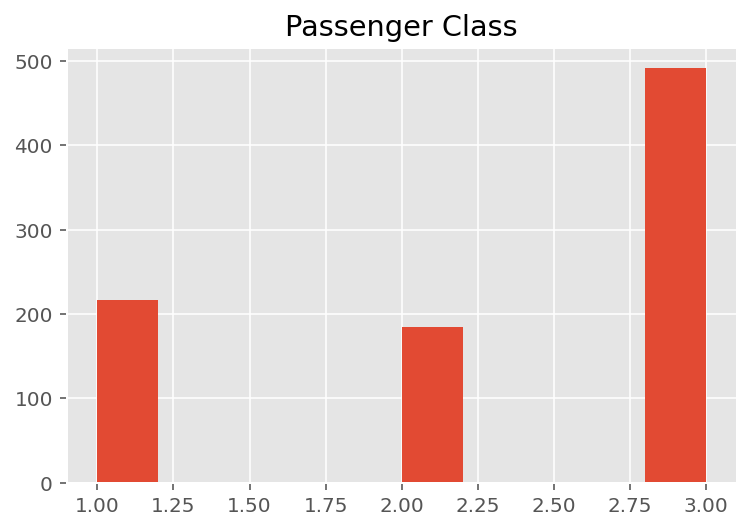

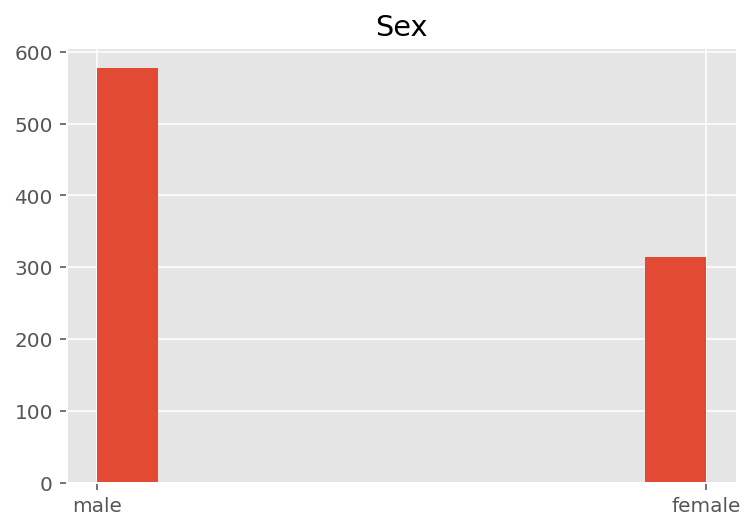

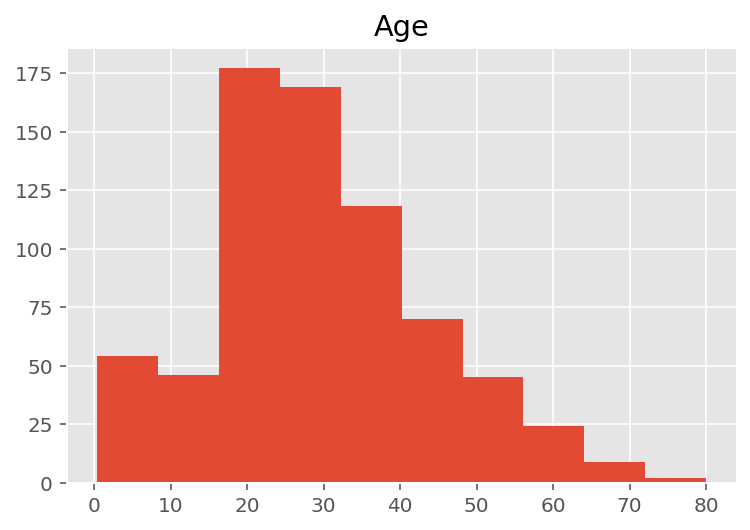

In [13]:
data['Pclass'].hist()
plt.title('Passenger Class')
plt.show()

data['Sex'].hist()
plt.title('Sex')
plt.show()

data['Age'].hist()
plt.title('Age')
plt.show()

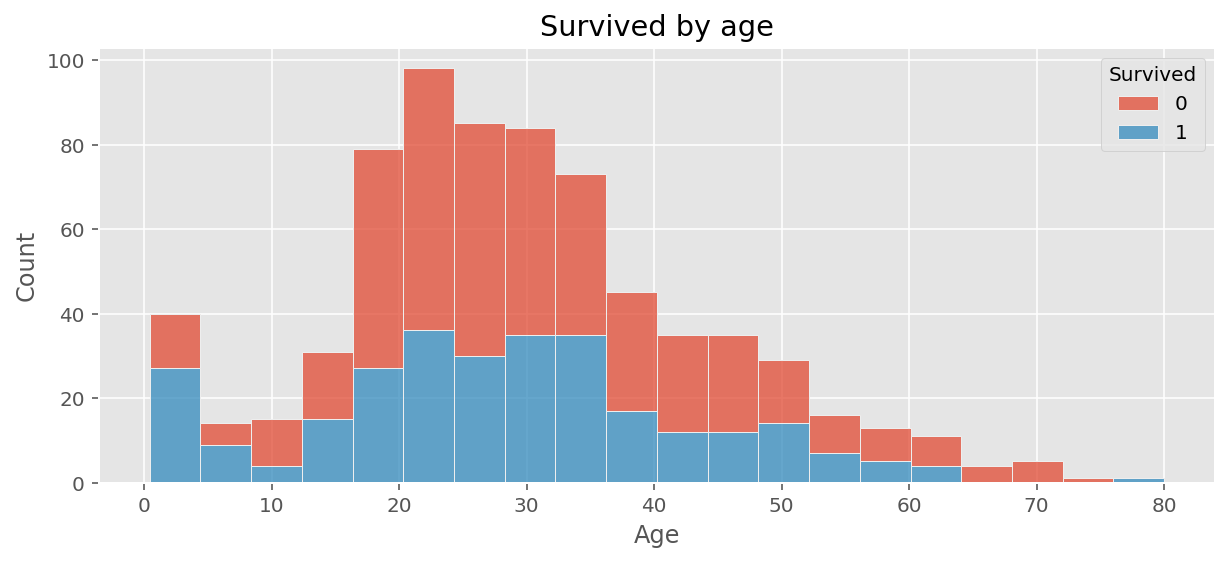

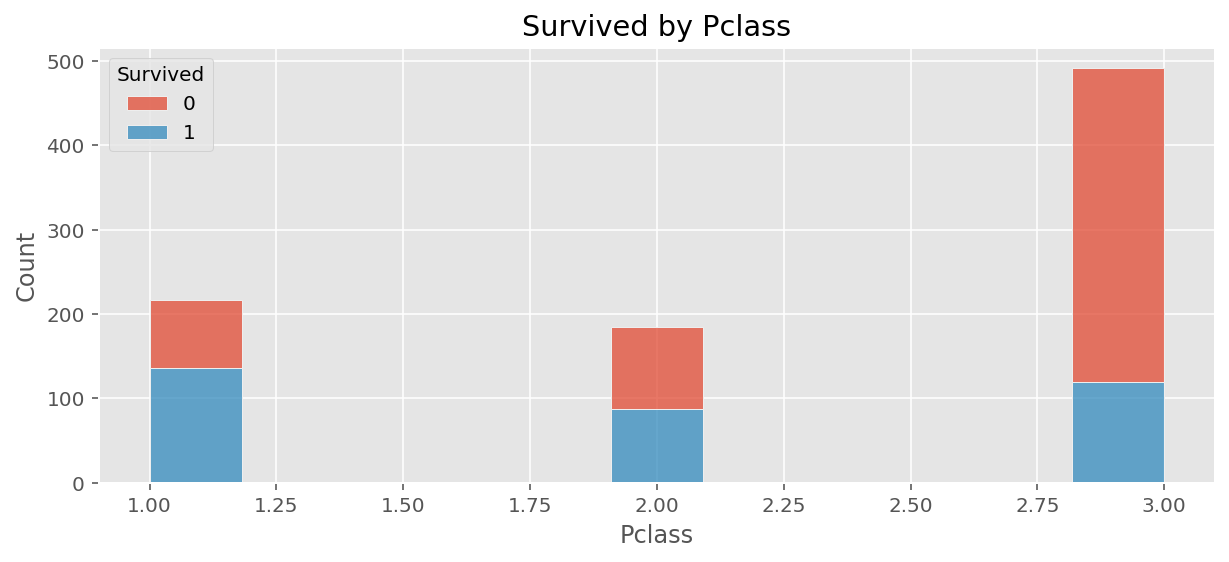

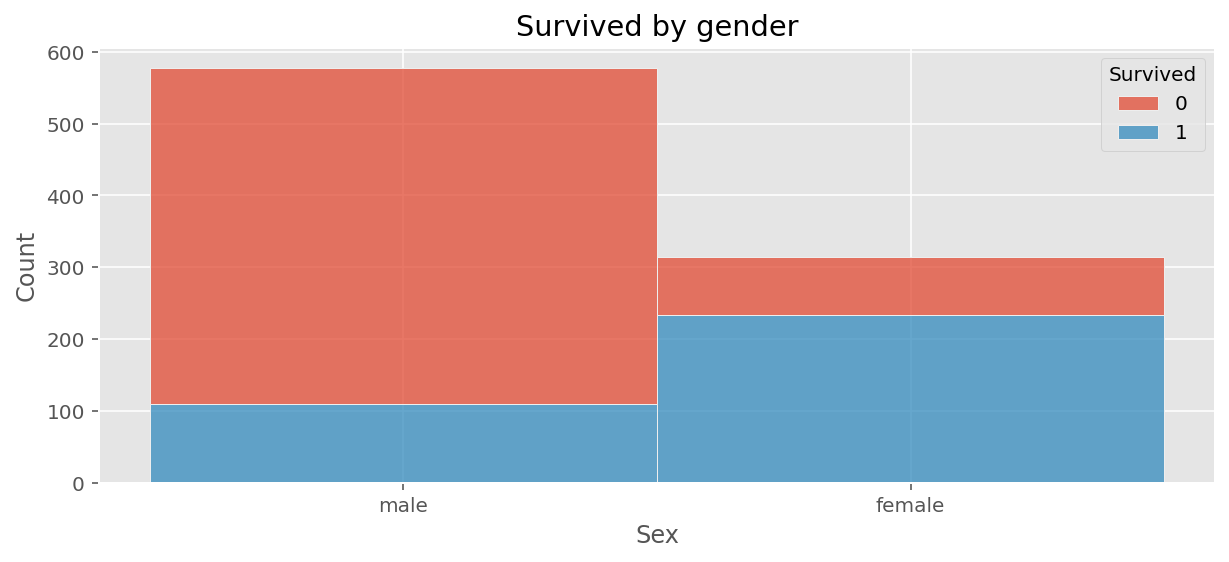

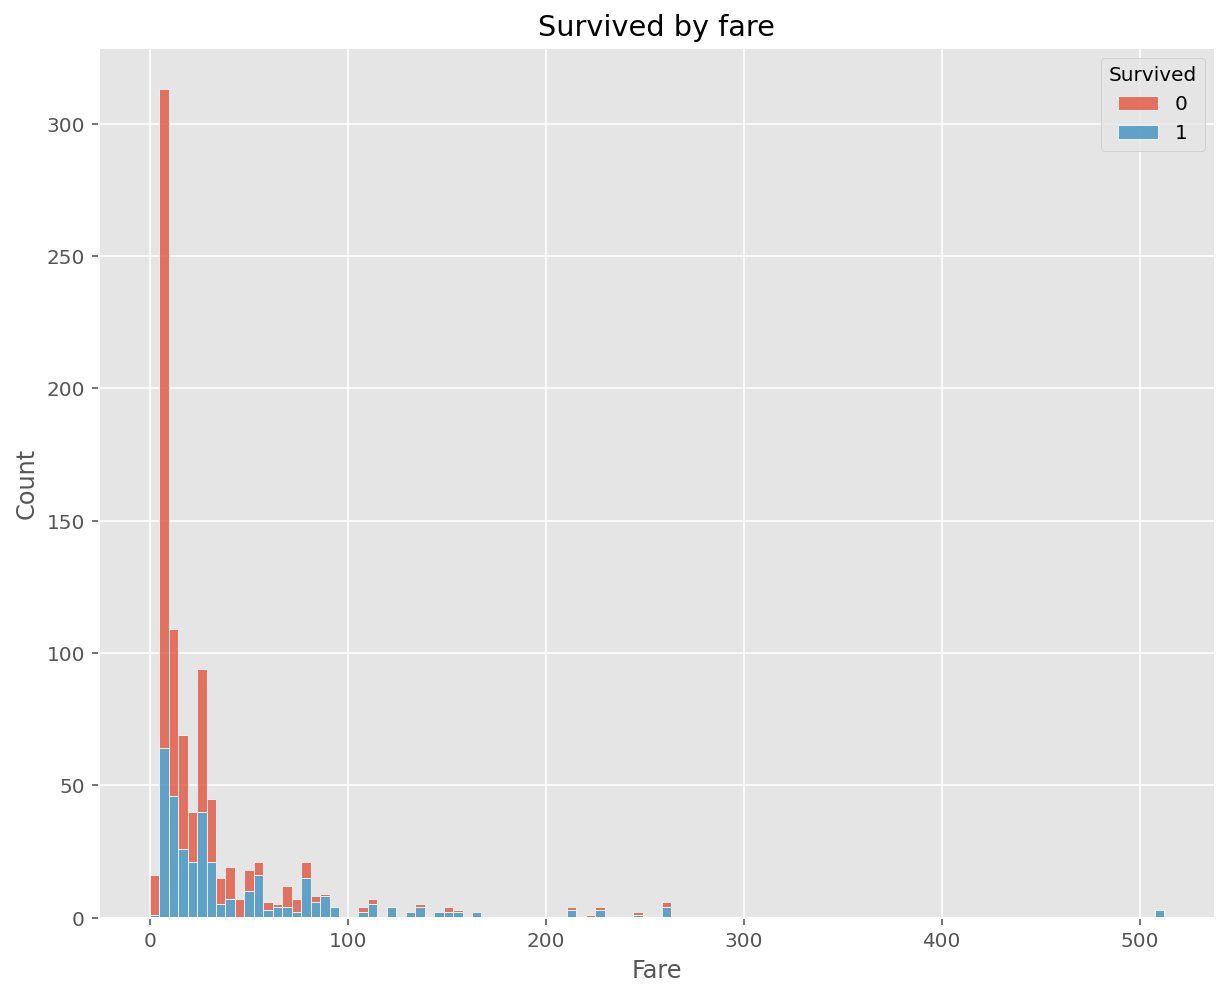

In [35]:
plt.figure(figsize=(10,4))
plt.title('Survived by age')
sns.histplot(data=data, x='Age', hue='Survived', multiple= 'stack')
plt.show()

plt.figure(figsize=(10,4))
plt.title('Survived by Pclass')
sns.histplot(data=data, x='Pclass', hue='Survived', multiple= 'stack')
plt.show()

plt.figure(figsize=(10,4))
plt.title('Survived by gender')
sns.histplot(data=data, x='Sex', hue='Survived', multiple= 'stack')
plt.show()

plt.figure(figsize=(10,8))
plt.title('Survived by fare')
sns.histplot(data=data, x='Fare', hue='Survived', multiple= 'stack')
plt.show()

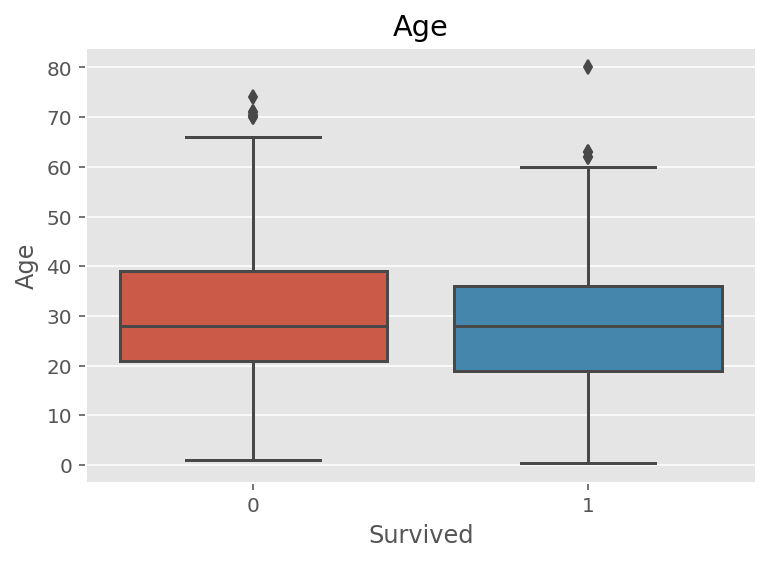

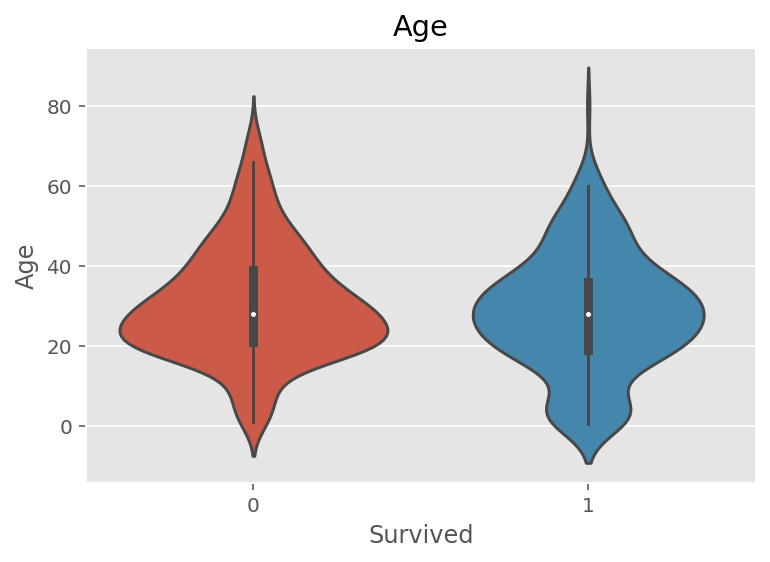

In [43]:
plt.title('Age')
sns.boxplot(data=data, x='Survived', y='Age')
plt.show()


plt.title('Age')
sns.violinplot(data=data, x='Survived', y='Age')
plt.show()

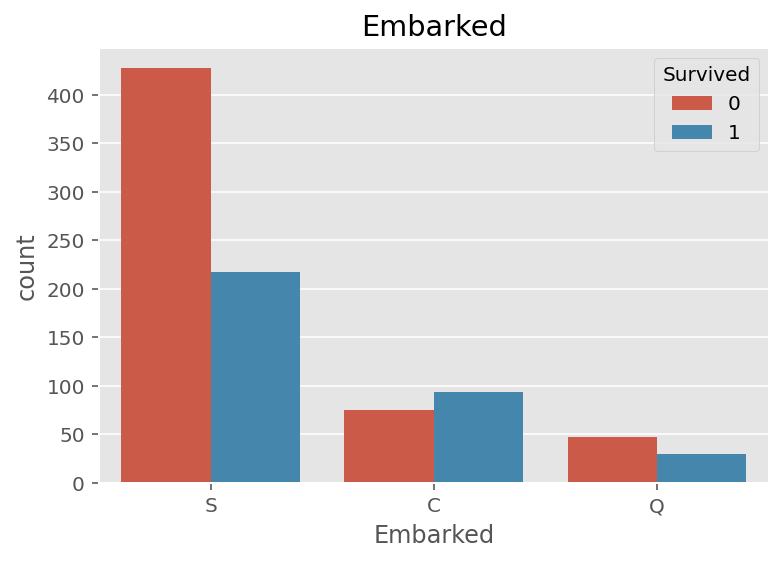

In [48]:
plt.title('Embarked')
sns.countplot(data=data, x='Embarked', hue='Survived')
plt.show()

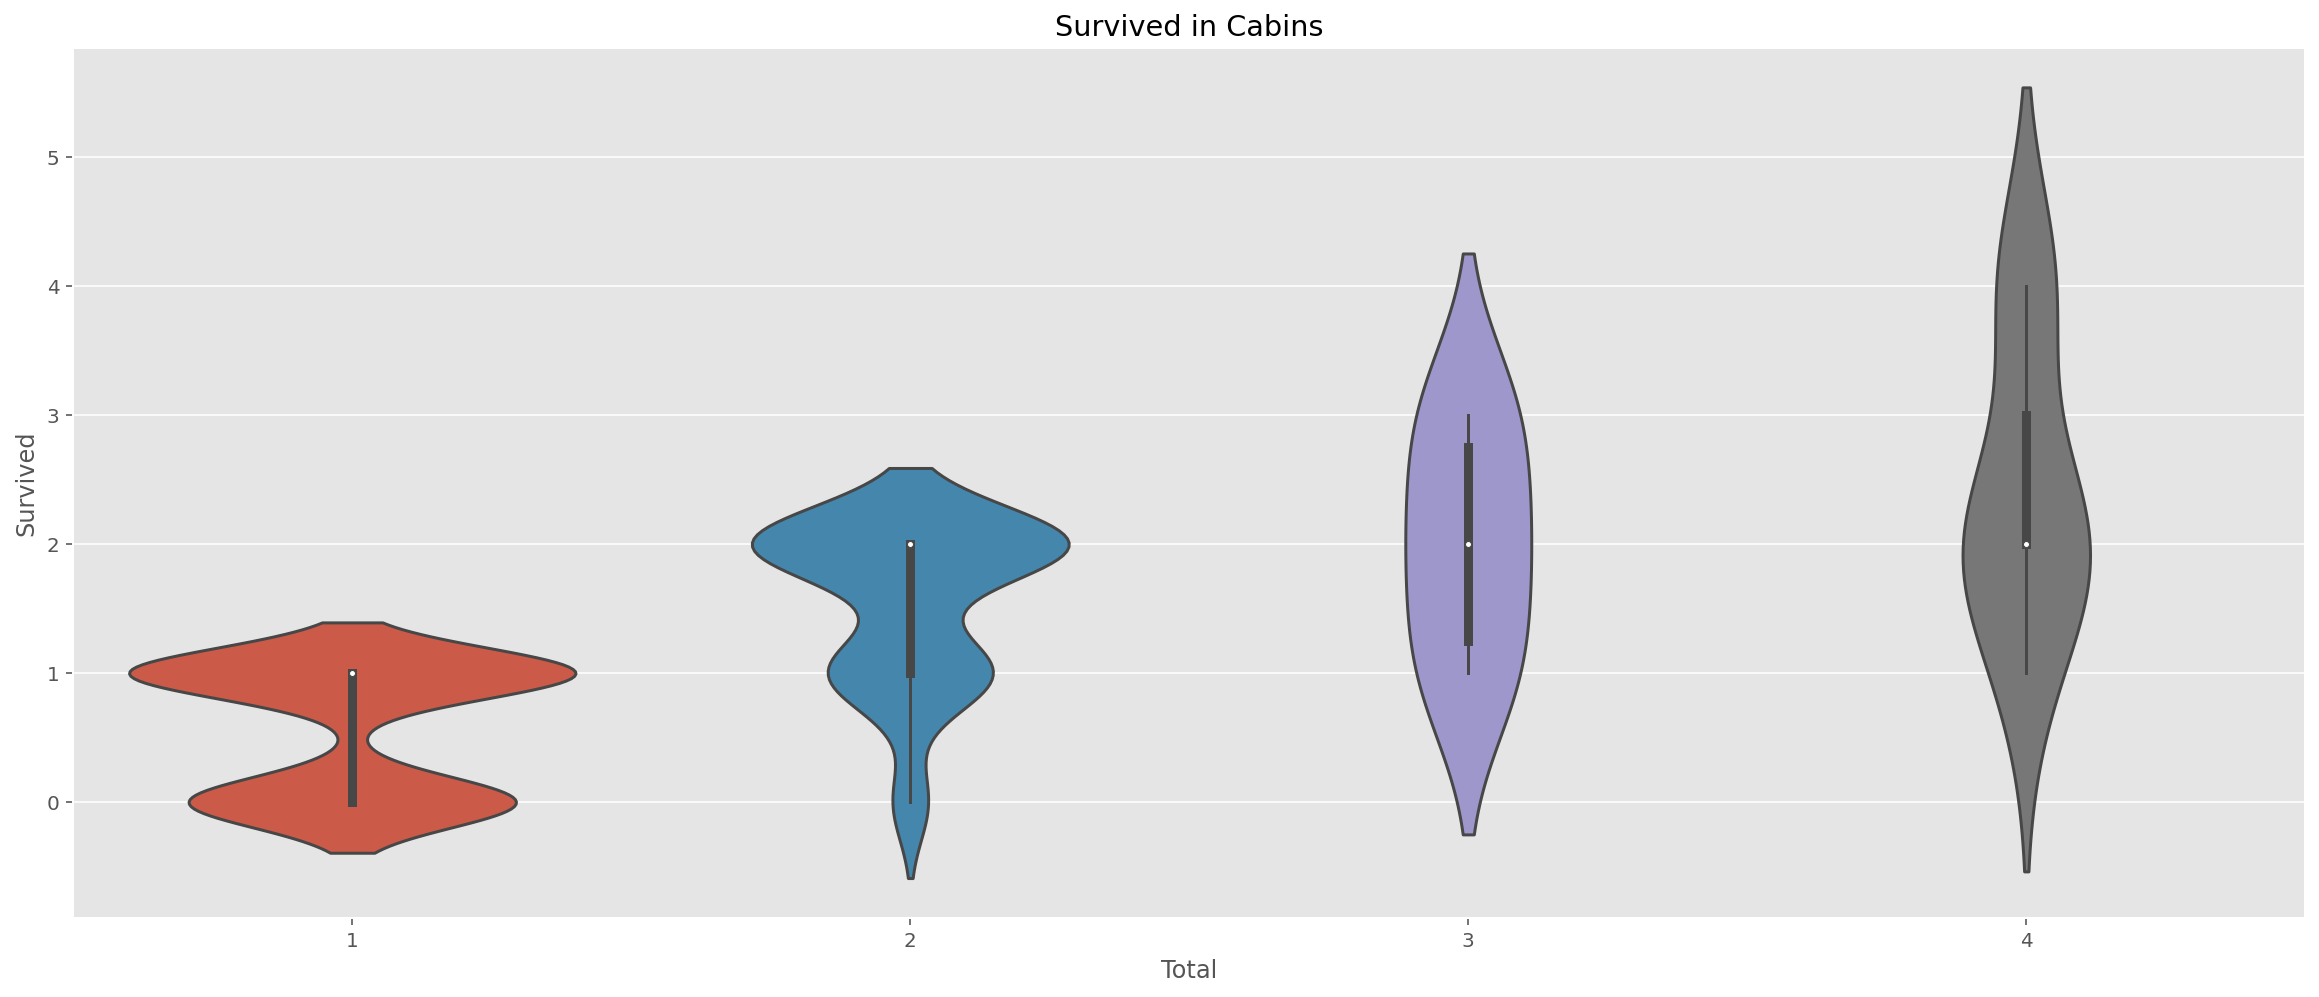

In [116]:
cabin_data = data[['Cabin', 'Survived']]
cabin_data = cabin_data.dropna()
cabin_data['Cabin'] = cabin_data['Cabin'].str.split(' ')
cabin_data = cabin_data.explode('Cabin')
cabin_survived = cabin_data.groupby('Cabin').agg(Survived=('Survived', 'sum'), Total= ('Survived', 'count')).reset_index()

plt.figure(figsize=(20,8))
plt.title('Survived in Cabins')
sns.violinplot(data=cabin_survived, x='Total', y='Survived')
plt.show()